<a href="https://colab.research.google.com/github/AhmadJamal01/Floodead-Inside/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/SatelliteImageryProject/dataset.zip /content/
!unzip /content/dataset.zip

In [10]:
import cv2
import numpy as np
import os
from tqdm import tqdm

In [28]:
!mkdir preprocessed_dataset
!mkdir preprocessed_dataset/flooded
!mkdir preprocessed_dataset/non-flooded

In [22]:
# Set the directory paths
flooded_dir = '/content/dataset/flooded'
non_flooded_dir = '/content/dataset/non-flooded'
preprocessed_flooded_dir = '/content/preprocessed_dataset/flooded'
preprocessed_non_flooded_dir = '/content/preprocessed_dataset/non-flooded'

In [9]:
# Define a function to apply dark object subtraction
def dark_object_subtraction(img):
    # Split the image into its color channels
    b, g, r = cv2.split(img)
    
    # Find the minimum value in each channel
    min_b = np.min(b)
    min_g = np.min(g)
    min_r = np.min(r)
    
    # Subtract the minimum value from each channel
    b = b - min_b
    g = g - min_g
    r = r - min_r
    
    # Merge the channels back together
    img = cv2.merge((b, g, r))
    
    return img

# Gray Scale Preprocessing

In [13]:
# Loop through the flooded images
for filename in tqdm(os.listdir(flooded_dir)):
    # Load the image
    img = cv2.imread(os.path.join(flooded_dir, filename))
    
    # Apply dark object subtraction for haze removal
    img = dark_object_subtraction(img)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    hist_eq = cv2.equalizeHist(gray)
    
    # Apply contrast stretching
    min_val = np.min(hist_eq)
    max_val = np.max(hist_eq)
    contrast_stretch = (hist_eq - min_val) / (max_val - min_val) * 255
    
    # Save the preprocessed image
    cv2.imwrite(os.path.join(preprocessed_flooded_dir, f'{filename}'), contrast_stretch)

# Loop through the non-flooded images
for filename in tqdm(os.listdir(non_flooded_dir)):
    # Load the image
    img = cv2.imread(os.path.join(non_flooded_dir, filename))
    
    # Apply dark object subtraction for haze removal
    img = dark_object_subtraction(img)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    hist_eq = cv2.equalizeHist(gray)
    
    # Apply contrast stretching
    min_val = np.min(hist_eq)
    max_val = np.max(hist_eq)
    contrast_stretch = (hist_eq - min_val) / (max_val - min_val) * 255
    
    # Save the preprocessed image
    cv2.imwrite(os.path.join(preprocessed_non_flooded_dir, f'{filename}'), contrast_stretch)


100%|██████████| 461/461 [02:17<00:00,  3.35it/s]


(1503, 1509, 3)
(1503, 1509)


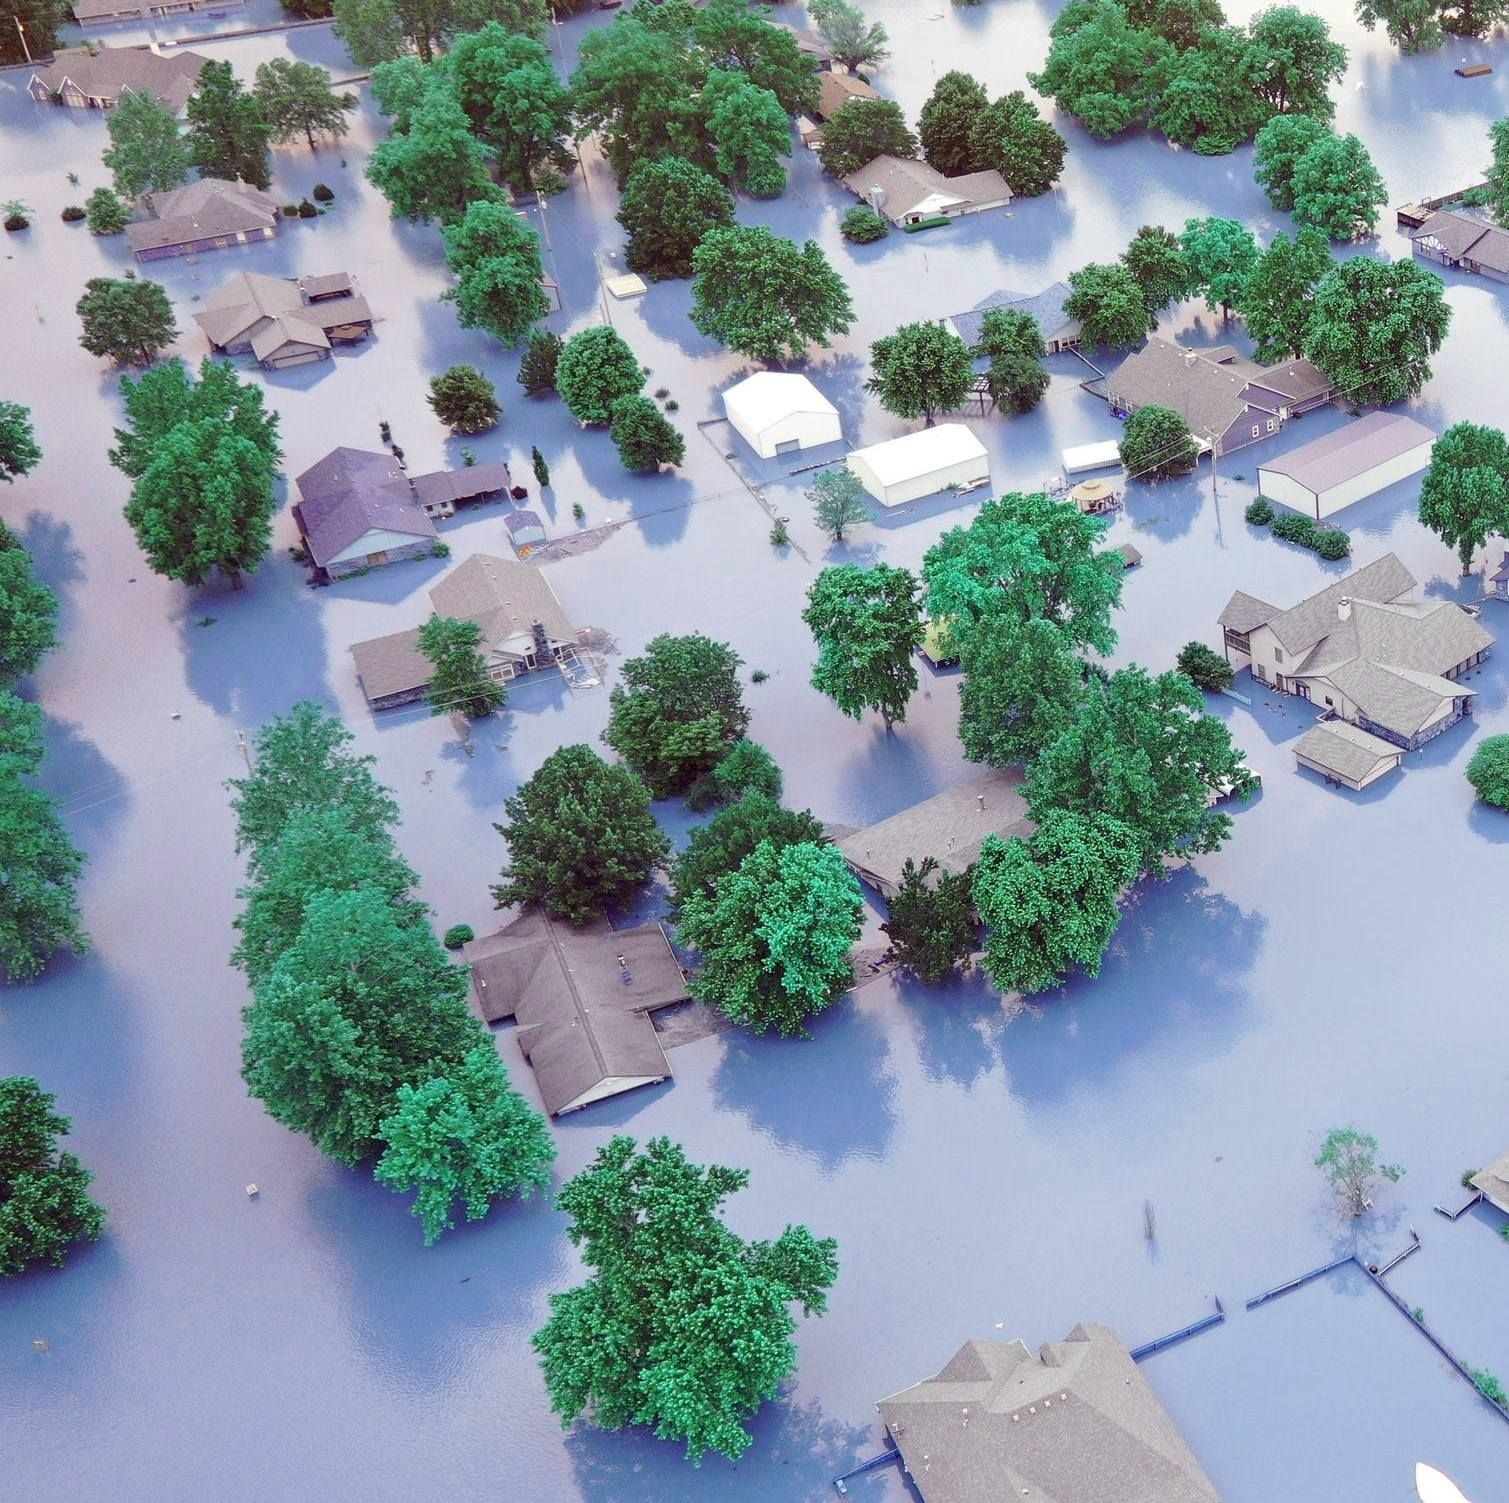

In [20]:
test = cv2.imread('/content/dataset/flooded/0.jpg')
test_gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
print(test.shape)
print(test_gray.shape)
test_dark = dark_object_subtraction(test)
from google.colab.patches import cv2_imshow
cv2_imshow(test_dark)

# RGB Preprocessing

In [34]:
# Define a function to apply histogram equalization to a color image
def equalize_hist_color(img):
    # Split the image into its color channels
    b, g, r = cv2.split(img)
    
    # Apply histogram equalization to each channel
    b_eq = cv2.equalizeHist(b)
    g_eq = cv2.equalizeHist(g)
    r_eq = cv2.equalizeHist(r)
    
    # Merge the channels back together
    img_eq = cv2.merge((b_eq, g_eq, r_eq))
    
    return img_eq

# Define a function to apply contrast stretching to a color image
def contrast_stretch_color(img):
    # Split the image into its color channels
    b, g, r = cv2.split(img)
    
    # Apply contrast stretching to each channel
    min_b = np.min(b)
    max_b = np.max(b)
    b_stretch = (b - min_b) / (max_b - min_b) * 255
    
    min_g = np.min(g)
    max_g = np.max(g)
    g_stretch = (g - min_g) / (max_g - min_g) * 255
    
    min_r = np.min(r)
    max_r = np.max(r)
    r_stretch = (r - min_r) / (max_r - min_r) * 255
    
    # Merge the channels back together
    img_stretch = cv2.merge((b_stretch, g_stretch, r_stretch))
    
    return img_stretch

def apply_preprocessing(src_path, dest_path):
  kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  for filename in tqdm(os.listdir(src_path)):
    img = cv2.imread(os.path.join(src_path, filename))
    
    # Apply dark object subtraction for haze removal
    img = dark_object_subtraction(img)

    # Apply histogram equalization
    hist_eq = equalize_hist_color(img)

    # Apply contrast stretching
    contrast_stretch = contrast_stretch_color(hist_eq)

    # Apply a sharpening filter
    # sharpened = cv2.filter2D(contrast_stretch, -1, kernel)

    # Apply a denoising filter
    # denoised = cv2.fastNlMeansDenoisingColored(sharpened, None, 10, 10, 7, 21)

    # Save the preprocessed image
    cv2.imwrite(os.path.join(dest_path, f'{filename}'), contrast_stretch)


In [35]:
apply_preprocessing(flooded_dir,preprocessed_flooded_dir)
apply_preprocessing(non_flooded_dir,preprocessed_non_flooded_dir)

100%|██████████| 461/461 [03:32<00:00,  2.17it/s]


In [ ]:
!zip -r preprocessed_data.zip /content/preprocessed_dataset

In [37]:
!cp /content/preprocessed_data.zip /content/drive/MyDrive/SatelliteImageryProject/